# Introduction: R vs Python
Both Python and R are popular programming languages for statistics.  While R’s functionality is developed with statisticians in mind (such as R's strong data visualization capabilities), Python is often praised for its easy-to-understand syntax.

The purpose of R was to develop a language that focused on delivering a better and more user-friendly way to do data analysis, statistics and graphical models. 

The main difference for R and Python is that you will find R only in a data science environment; As a general purpose language, Python, on the other hand, is widely used in many fields, such as web development. 

## When to use R?

R is mainly used when the data analysis task requires standalone computing or analysis on individual servers. It’s great for exploratory work, and it's handy for almost any type of data analysis because of the huge number of packages and readily usable tests that often provide you with the necessary tools to get up and running quickly. R can even be part of a big data solution.

## When to use Python?

You can use Python when your data analysis tasks need to be integrated with web apps or if statistics code needs to be incorporated into a production database. Being a fully fledged programming language, it’s a great tool to implement algorithms for production use.


<img src="r-vs-python-activity.jpg">
(Cited from http://www.kdnuggets.com/2015/05/r-vs-python-data-science.html)

## Tutorial Content
- [R essentials](#R-essentials)
- [Data visualization with R and ggplot 2](#Data-visualization-with-R-and-ggplot-2)
- [Example Application: R and ggplot based on land-data](#Example-Application:-R-and-ggplot-based-on-land-data)
    - [GGplot Structures and Syntax](#GGplot-Structures-and-Syntax)
    - [Comparison of R essentials and ggplot on graphs generation](#Comparison-of-R-essentials-and-ggplot-on-graphs-generation)
- [Example Application: Geo-spatial analysis based on R libraries](#Example-Application:-Geo-spatial-analysis-based-on-R-libraries)

# R essentials
## “R Essentials” setup
The Anaconda team has created an “R Essentials” bundle with the IRKernel and over 80 of the most used R packages for data science, including dplyr, shiny, ggplot2, tidyr,caret and nnet.

Downloading “R Essentials” requires conda. 

Once you have conda, you may install “R Essentials” into the current environment:


    conda install -c r r-essentials
Then you could create a new environment just for “R essentials”:
    
    conda create -n my-r-env -c r r-essentials
Open a shell and run this command to start the Jupyter notebook interface in your browser:

    jupyter notebook
  

Start a new R notebook by selecting new: new R notebook at the right side of the interface.

<img src="newRNotebook.png">


## Check if the R essentials are installed correctly.
-    Run the dplyr library.
-    Run the native dataset of R: iris

In [8]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [69]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Data processing experiments with basic R
Use groupby, summarise, arrange, mean to do some simple aggregation on the data by R.

In [25]:
iris %>%
 group_by(Species) %>%
 summarise(Sepal.Width.Avg = mean(Sepal.Width),Sepal.Length.Avg = mean(Sepal.Length)) %>% 
 arrange(Sepal.Width.Avg,Sepal.Length.Avg)
 
iris %>%
 group_by(Species) %>%
 summarise(Petal.Width.Max = max(Petal.Width),Petal.Length.Max = max(Petal.Length)) %>% 
 arrange(Petal.Width.Max,Petal.Length.Max)

,Species,Sepal.Width.Avg,Sepal.Length.Avg
1,versicolor,2.77,5.936
2,virginica,2.974,6.588
3,setosa,3.428,5.006


,Species,Petal.Width.Max,Petal.Length.Max
1,setosa,0.6,1.9
2,versicolor,1.8,5.1
3,virginica,2.5,6.9


# Data visualization with R and ggplot 2

![](images/Economist1.png)
the graphic from the Economist



## Why use ggplot2?

-   consistent underlying `grammar of graphics` (Wilkinson, 2005)
-   plot specification at a high level of abstraction
-   very flexible
-   theme system for polishing plot appearance
-   mature and complete graphics system
-   many users, active mailing list

That said, there are some things you cannot (or should not) do With ggplot2:

-   3-dimensional graphics (see the rgl package)
-   Graph-theory type graphs (nodes/edges layout; see the igraph package)
-   Interactive graphics (see the ggvis package)

(Cited from: http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html)

In [1]:
library(ggplot2)

### Simply plot the Petal.Width vs. Petal.Length

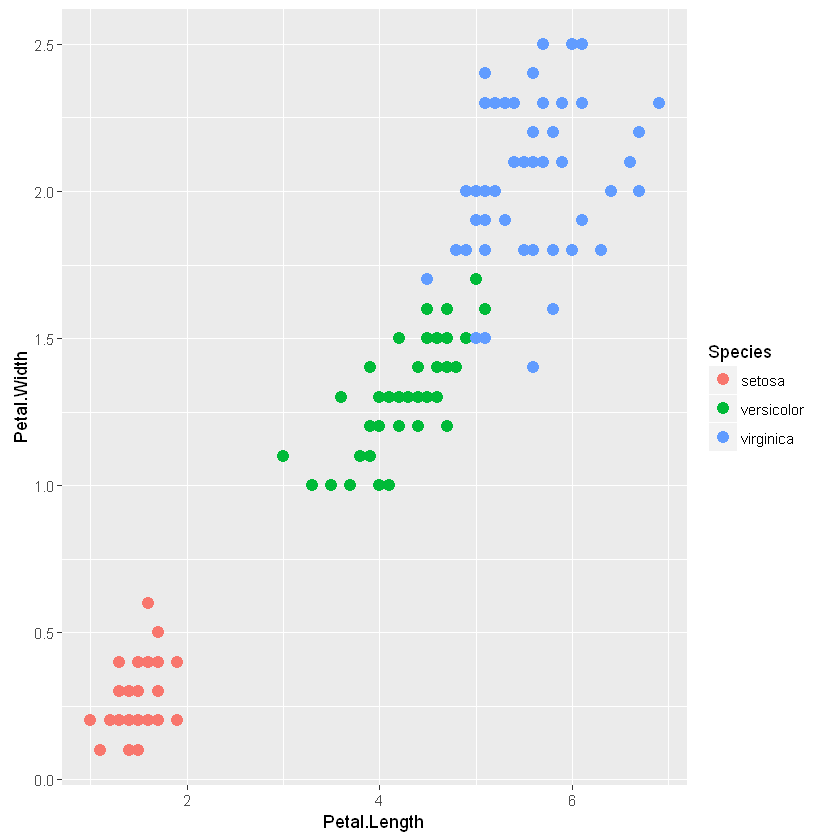

In [81]:
ggplot(data=iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) + geom_point(size=3)

### Using native diamonds library to make some simple graphs

  carat       cut color clarity depth table price    x    y    z
1  0.23     Ideal     E     SI2  61.5    55   326 3.95 3.98 2.43
2  0.21   Premium     E     SI1  59.8    61   326 3.89 3.84 2.31
3  0.23      Good     E     VS1  56.9    65   327 4.05 4.07 2.31
4  0.29   Premium     I     VS2  62.4    58   334 4.20 4.23 2.63
5  0.31      Good     J     SI2  63.3    58   335 4.34 4.35 2.75
6  0.24 Very Good     J    VVS2  62.8    57   336 3.94 3.96 2.48

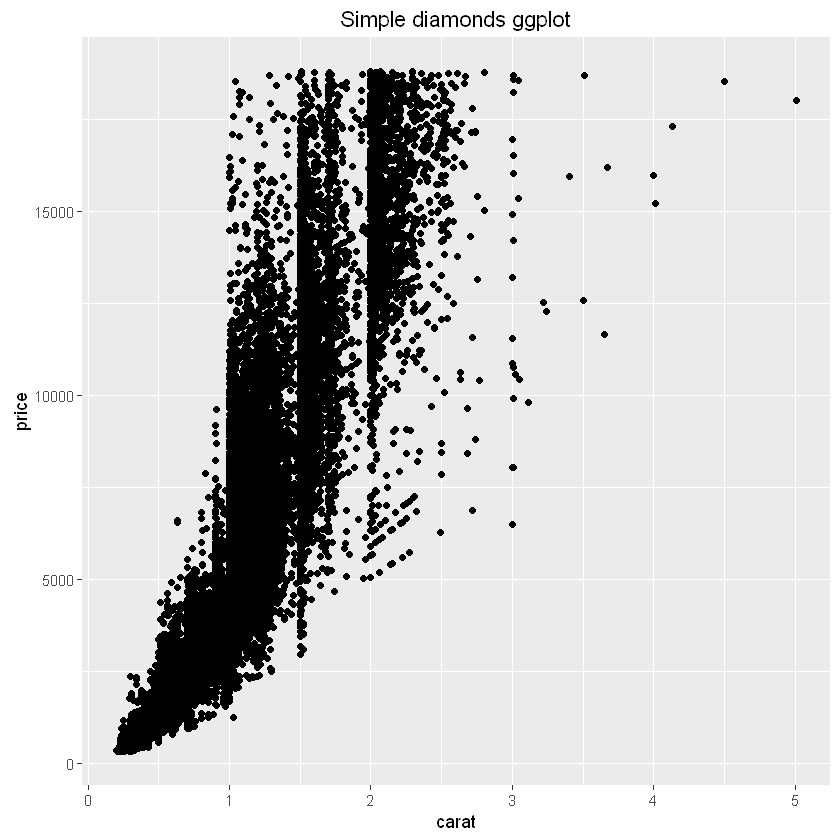

In [92]:
head(diamonds)
ggplot(data=diamonds, aes(x=carat, y=price)) + geom_point() +
  ggtitle("Simple diamonds ggplot")


### Color the points by a factor variable: 'depth'

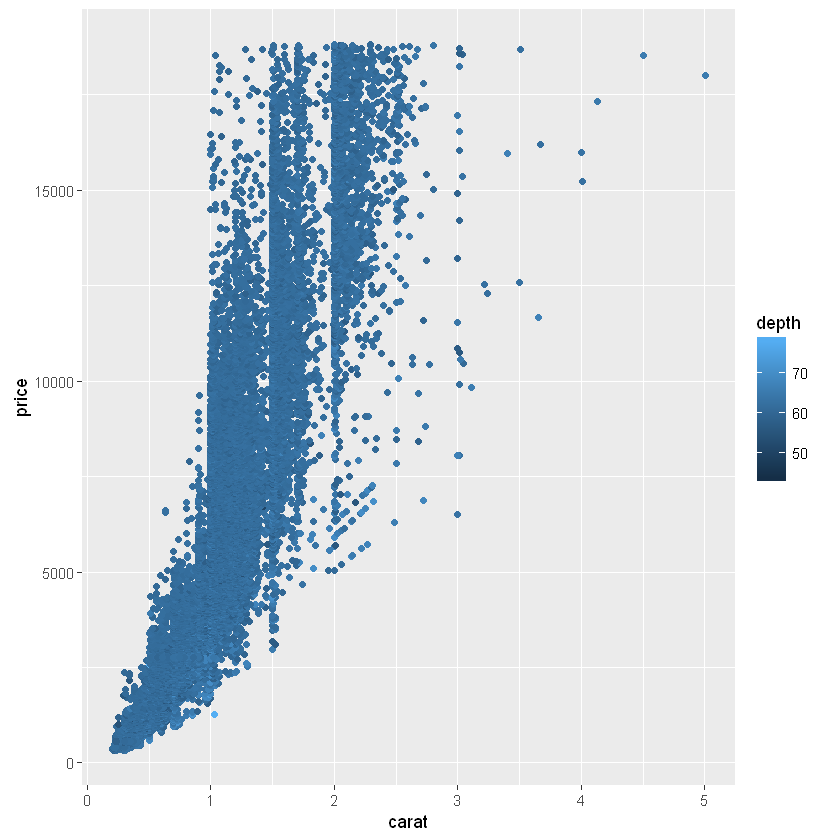

In [98]:

# color by a factor variable
ggplot(data = diamonds, aes(x = carat, y = price, colour = depth)) + geom_point()

### Color the points by a factor variable: 'clarity'

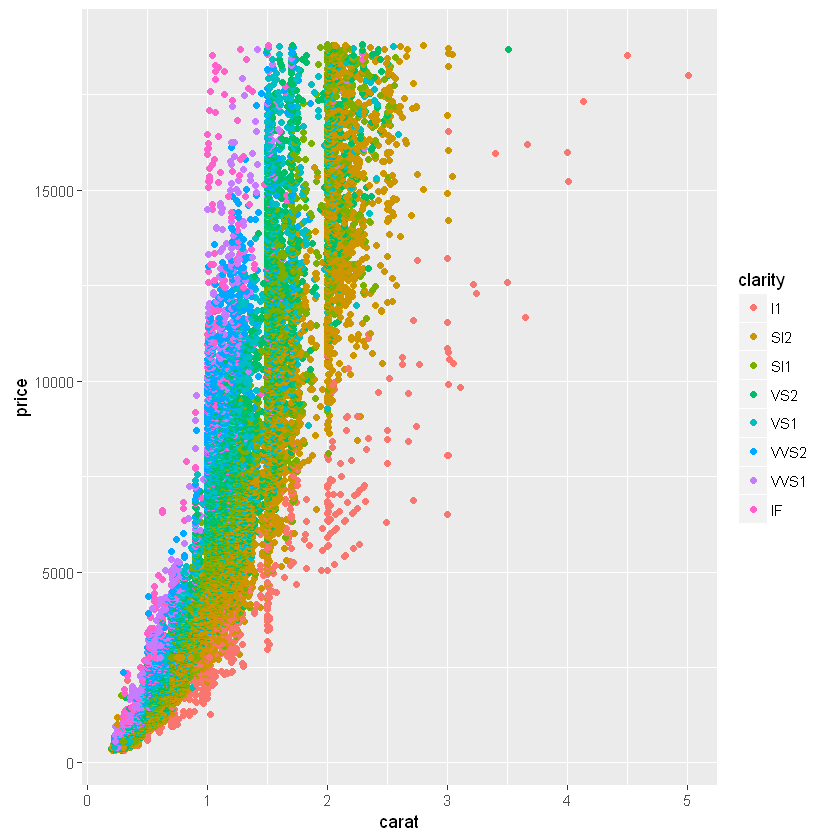

In [97]:
ggplot(data = diamonds, aes(x = carat, y = price, colour = clarity)) + geom_point()


# Example Application: R and ggplot based on land-data
### Start to use some more complex and real dataset
(Data from https://www.lincolninst.edu/subcenters/land-values/land-prices-by-state.asp)

In [3]:
  housing <- read.csv("dataSets/landdata-states.csv")
  head(housing)

,State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
1,AK,West,20101,224952,160599,64352,28.6,1.481,1.552
2,AK,West,20102,225511,160252,65259,28.9,1.484,1.576
3,AK,West,20093,225820,163791,62029,27.5,1.486,1.494
4,AK,West,20094,224994,161787,63207,28.1,1.481,1.524
5,AK,West,20074,234590,155400,79190,33.8,1.544,1.885
6,AK,West,20081,233714,157458,76256,32.6,1.538,1.817


# Comparison of R essentials and ggplot on graphs generation

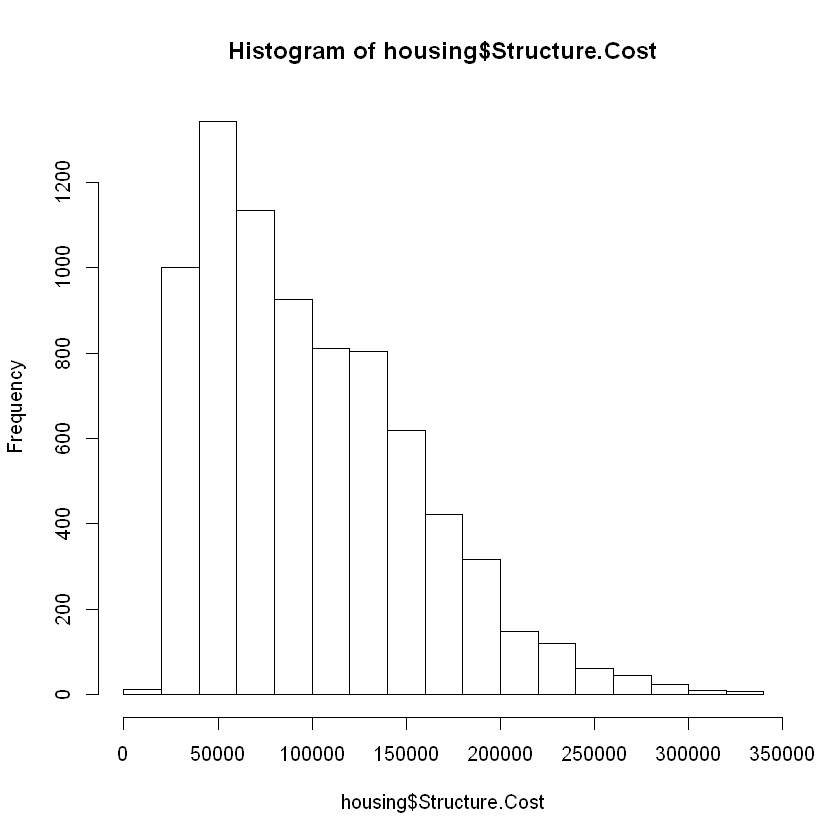

In [85]:
# Generate simple histogram by R
hist(housing$Structure.Cost)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


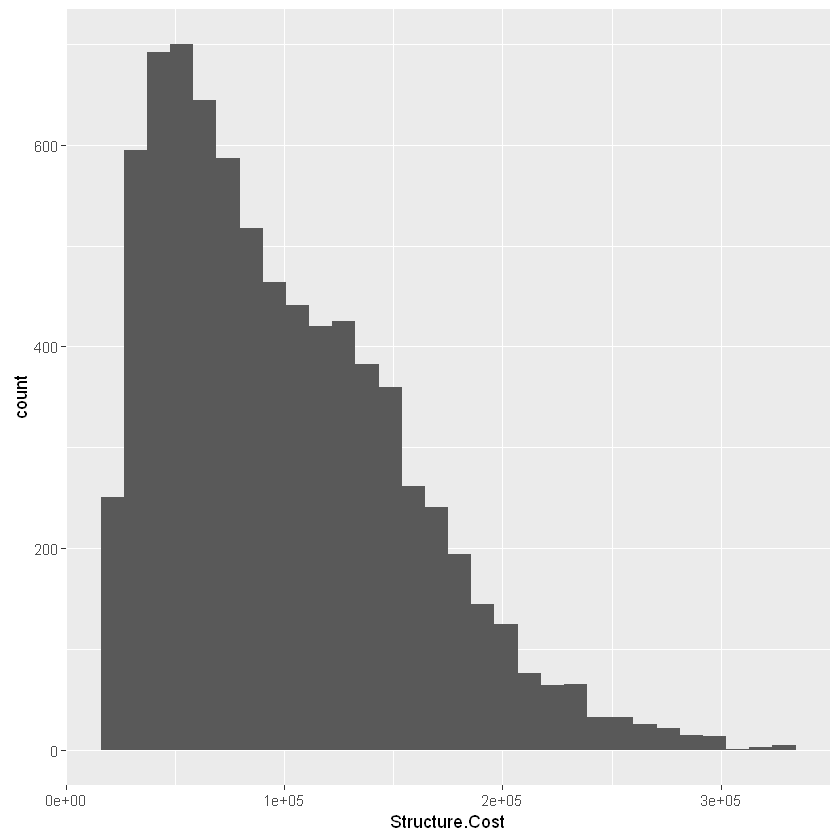

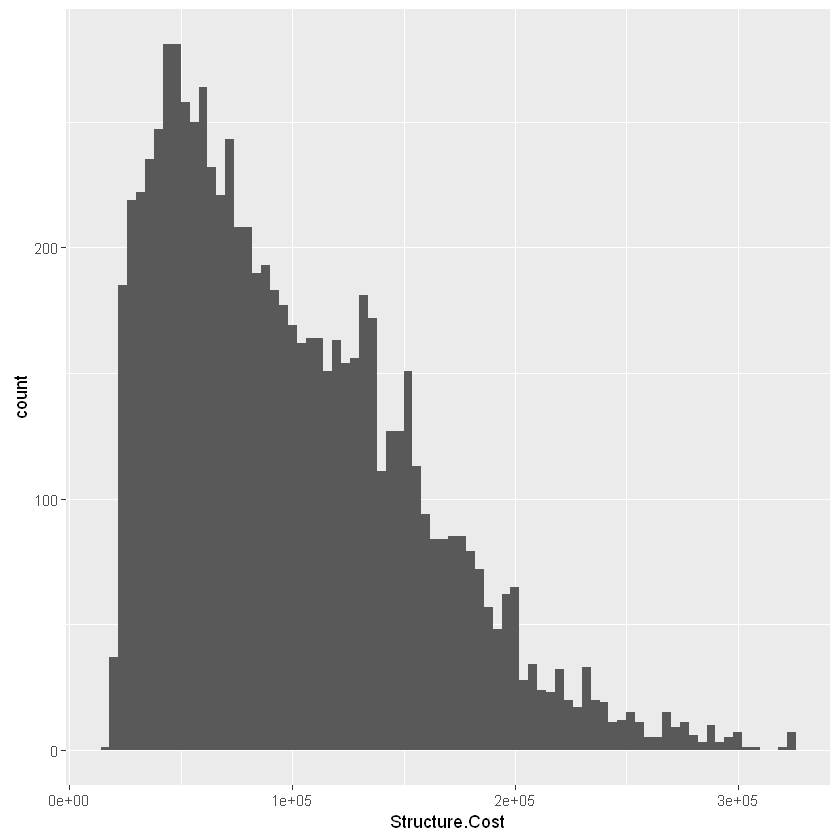

In [87]:
#Generate simple histogram by ggplot2 
  library(ggplot2)
  ggplot(housing, aes(x = Structure.Cost)) +
    geom_histogram()

#Easily change the binwidth param
  library(ggplot2)
  ggplot(housing, aes(x = Structure.Cost) ) +
    geom_histogram(binwidth=4000)

### Compare base R and ggplot on a more complex graph with legends

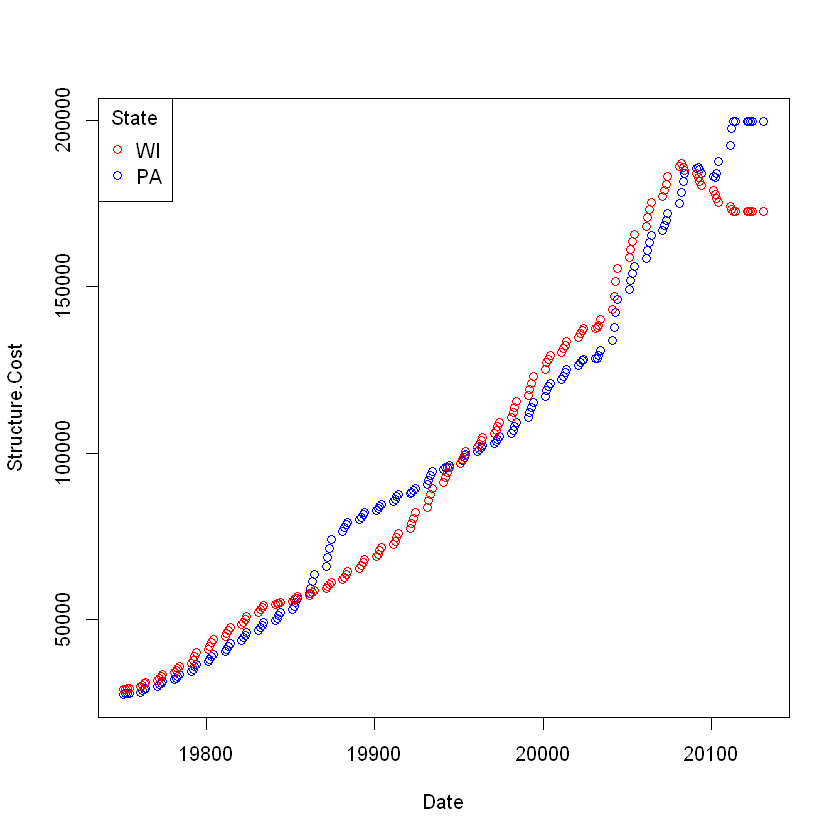

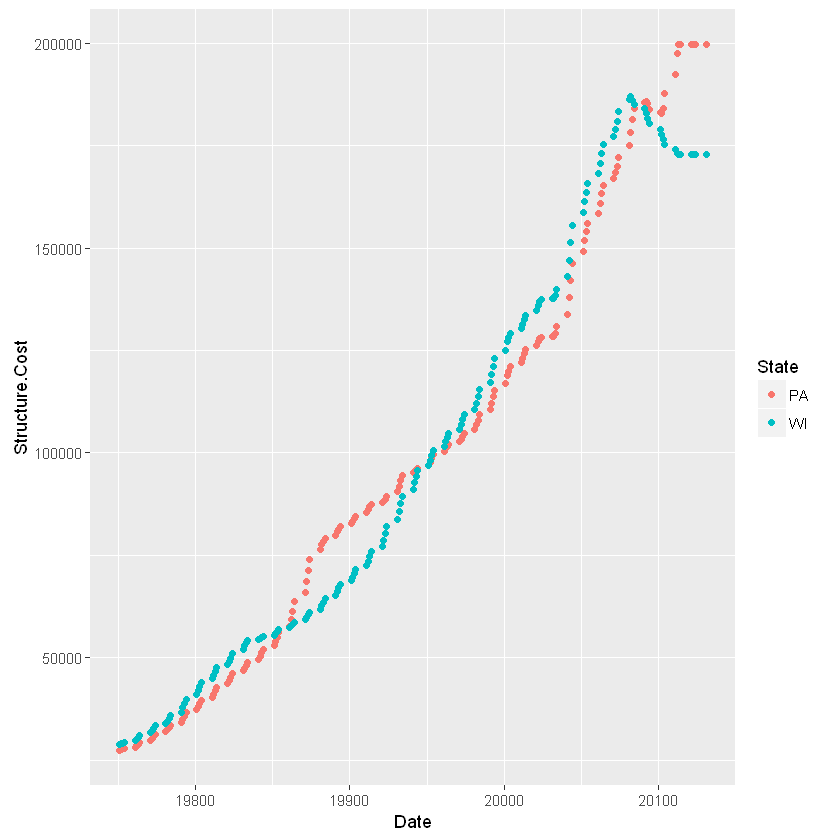

In [24]:
# Generate annotated scatter points graph by R  
plot(Structure.Cost ~ Date, col="blue",
       data=subset(housing, State == "PA"))
  points(Structure.Cost ~ Date, col="red",
         data=subset(housing, State == "WI"))
  legend(x = 'topleft',
         c("WI", "PA"), title="State",
         col=c("red", "blue"),
         pch=c(1, 1))

# Generate annotated scatter points graph by ggplot
  ggplot(subset(housing, State %in% c("WI", "PA")),
         aes(x=Date,
             y=Structure.Cost,
             color=State))+
    geom_point()

# GGplot Structures and Syntax

### GGplot Aesthetic attribute


In ggplot `aesthetic` means the visual attributes. Such as:

-   position (coordinates)
-   color (border)
-   fill
-   shape (of points)
-   linetype
-   size

### Geometric Objects

`geom` objects are the actual marks we put on a plot. Such as:

-   points (`geom_point`, for scatter plots, dot plots, etc)
-   lines (`geom_line`, for time series, trend lines, etc)
-   boxplot (`geom_boxplot`, for, well, boxplots!)




### Combining geometric and aesthetic attribute together to make a graph
A plot must have at least one geom; there is no upper limit. You can add a geom to a plot using the `+` operator

### Scatter points with geom_point() attribute
geom_point requires mappings for x and y, all others are optional.

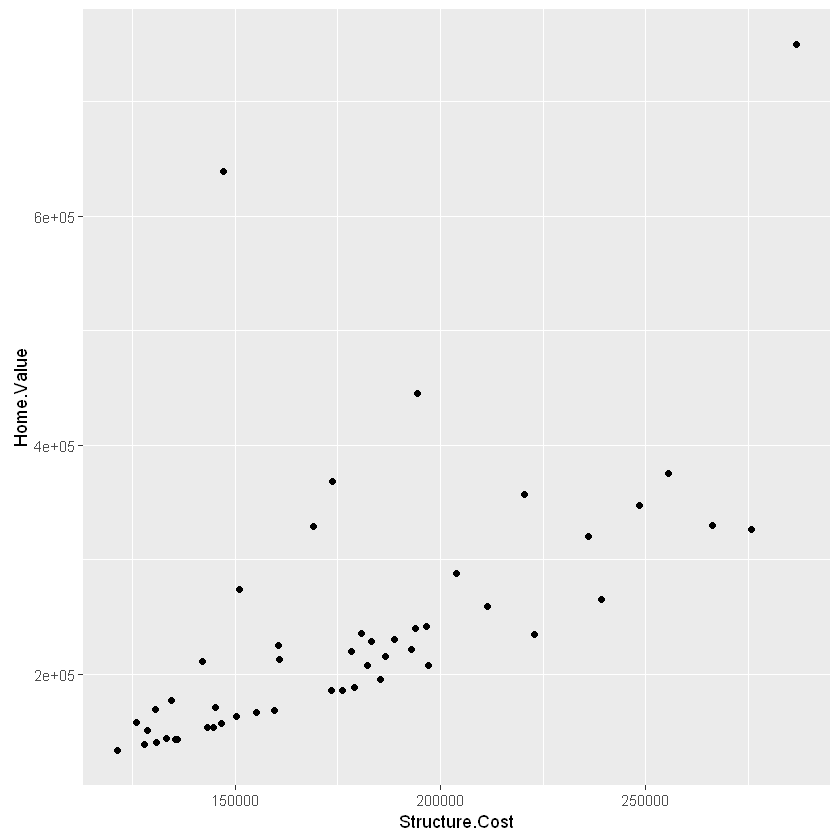

In [35]:
  h20101 <- subset(housing, Date == 20101) 
  ggplot(h20101,
         aes(x = Structure.Cost, y = Home.Value)) +
    geom_point()

### Lines 
A plot constructed with `ggplot` can have more than one geom. In that case the mappings established in the `ggplot()` call are plot defaults that can be added to or overridden. Our plot could use a regression line:

### Simple line connecting all the scatter points

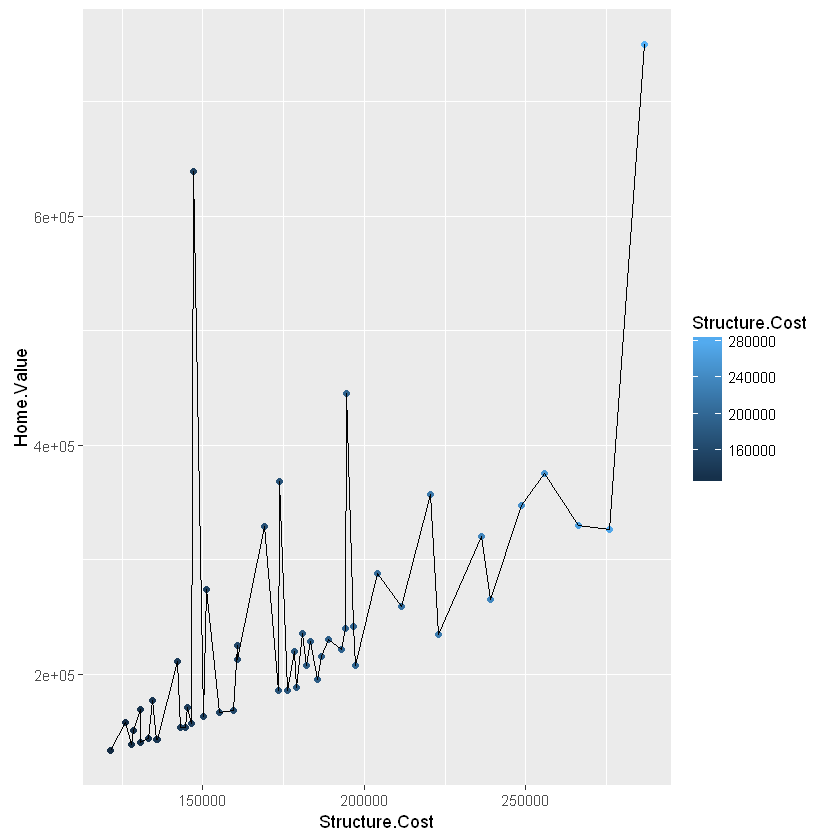

In [66]:
  

  p1 <- ggplot(h20101, aes(x = Structure.Cost, y = Home.Value))

  p1 + geom_point(aes(color = Structure.Cost)) +
    geom_line(aes(y = Home.Value))


### Predict the line trend 
(smoother version than simply connecting all the points, using predict method)

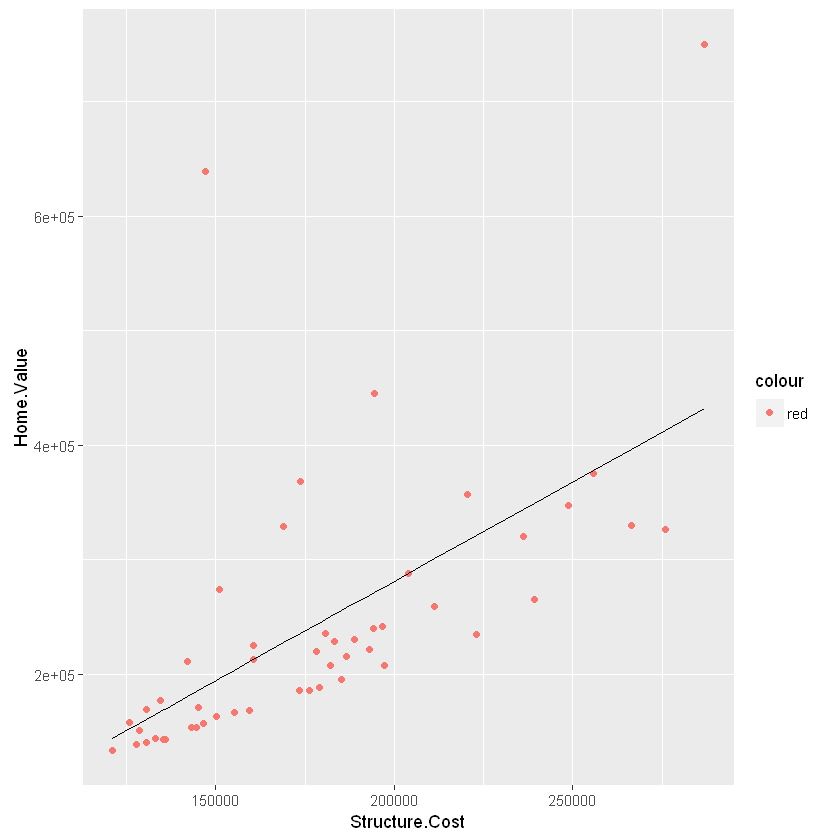

In [67]:
 p1 <- ggplot(h20101, aes(x = Structure.Cost, y = Home.Value))
h20101$pred.HV <- predict(lm(Home.Value ~ Structure.Cost, data = h20101))
p1 + geom_point(aes(color = 'red'))+
    geom_line(aes(y = pred.HV ))

### Another way to do simple linear regression, with better visuals: geom_smooth

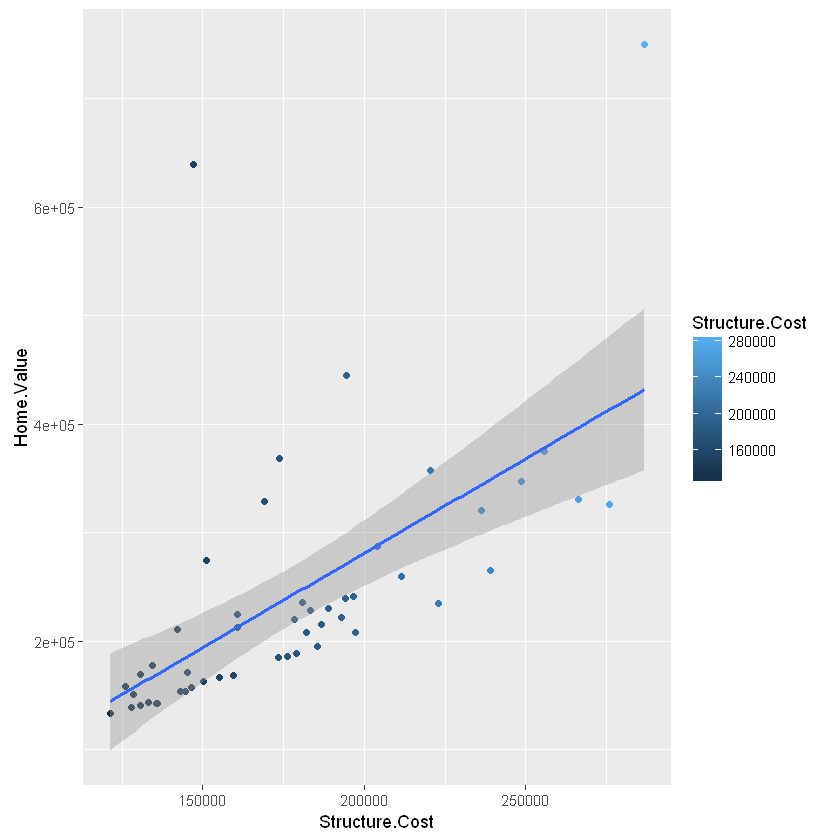

In [68]:

 p1 + geom_point(aes(color = Structure.Cost)) +
    geom_smooth(method='lm')

### Text labels: geom_text

Like all the `geom` objects that accept a certain series of mappings, `geom_text()` takes in the mapping as a `labels` .

All the points would be map to that label given the certain mapping. (Usually mapped to its id, 'State' is the id here in my dataset. Sometimes mapped to its category, 'region' is the category here in my dataset. )

Warning message:
"Removed 1 rows containing missing values (geom_text)."

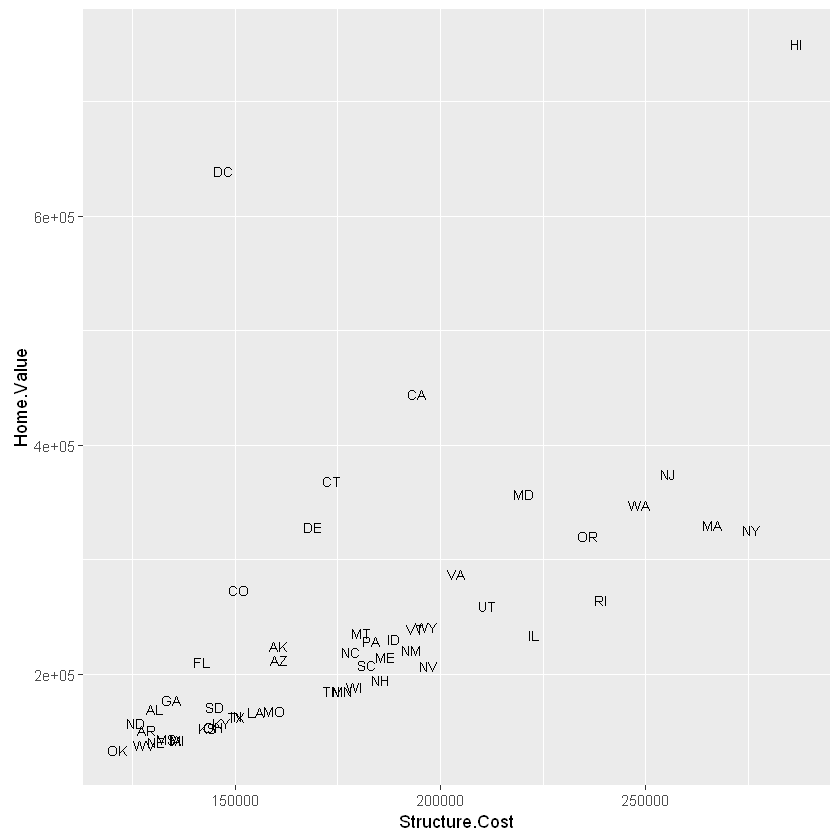

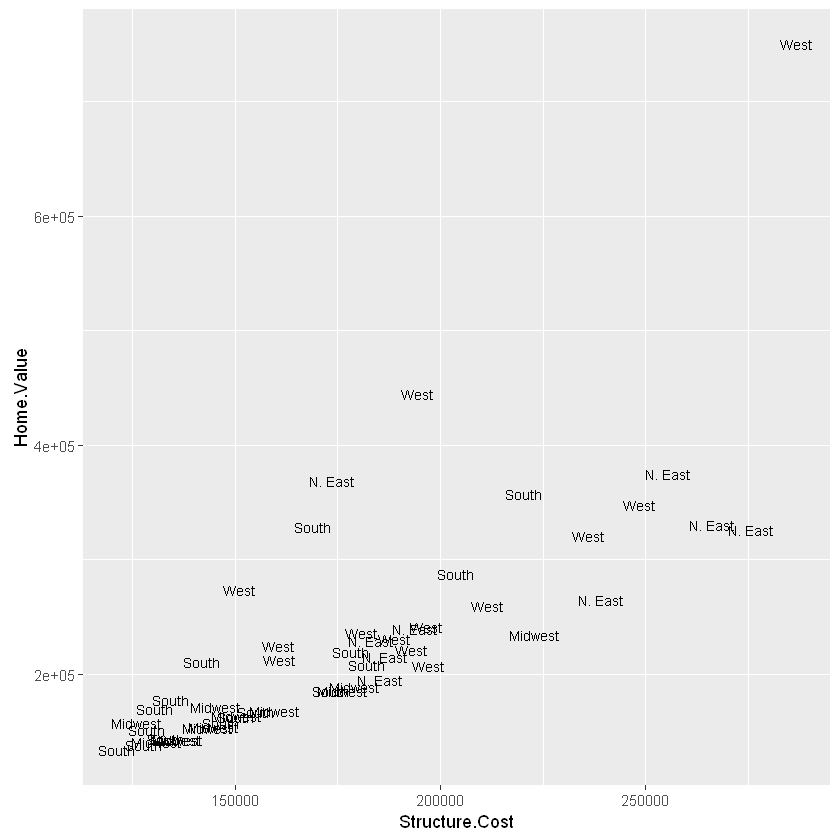

In [79]:
  p1 + 
    geom_text(aes(label=State), size = 3)

  p1 + 
    geom_text(aes(label=region), size = 3)

### Mapping the points to a shape instead of a text label
(i.e. circle, triangle, etc)

Warning message:
"Removed 1 rows containing missing values (geom_point)."

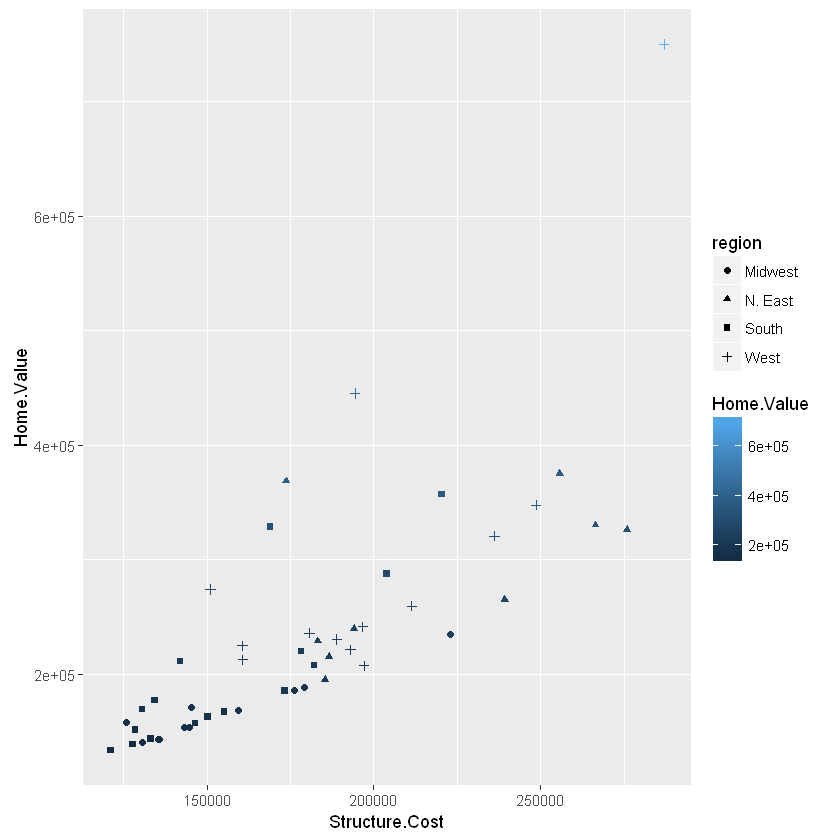

In [80]:
  p1 +
    geom_point(aes(color=Home.Value, shape = region))

# Example Application: Geo-spatial analysis based on R libraries

##  Installing relevant libraries and Loading Data

- Run the following commands.
- Or download the packages from http://cran.us.r-project.org, unzip and move to /library folder of your R directory.

In [83]:
x <- c("ggmap", "rgdal", "rgeos", "maptools", "dplyr", "tidyr", "tmap")
install.packages("tmap",repos='http://cran.cnr.berkeley.edu/') # warning: this may take a number of minutes 
lapply("tmap", library, character.only = TRUE) # load the required packages

package 'tmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yao\AppData\Local\Temp\RtmpMfBCDx\downloaded_packages


ERROR: Error: package or namespace load failed for 'tmap'


## Loading Datasets in .shape file
The ﬁles beginning london_sport in the data/ directory contain the population of London Boroughs in 2001 and the percentage of the population participating in sporting activities. This data originates from the Active People Survey. The boundary data is from the Ordnance Survey. (Cited from cran.r-project.org)

readOGR takes in dsn and layer as parameters:
     
-     dsn which stands for “data source name” and speciﬁes the location where the ﬁle is stored
-     layer which speciﬁes the ﬁle name. 

In [3]:
library(rgdal) 
lnd <- readOGR(dsn = "dataSets", layer = "london_sport")

Loading required package: sp
rgdal: version: 1.1-10, (SVN revision 622)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.0.1, released 2015/09/15
 Path to GDAL shared files: C:/Users/Yao/Anaconda2/R/library/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: C:/Users/Yao/Anaconda2/R/library/rgdal/proj
 Linking to sp version: 1.2-3 


OGR data source with driver: ESRI Shapefile 
Source: "dataSets", layer: "london_sport"
with 33 features
It has 4 fields


## The structure of spatial data in R

 Spatial objects are made up of a number of diﬀerent slots, the key ones being @data and @polygons (or @lines for line data) geometry data. 
 
 @data is just a table of some relevant geographical attributes like following.

In [29]:
head(lnd@data, n = 2)
mean(lnd$Partic_Per)

,ons_label,name,Partic_Per,Pop_2001
0,00AF,Bromley,21.7,295535
1,00BD,Richmond upon Thames,26.6,172330


[1] 20.05455

To inspect the @polygon slot, selects the ﬁrst polygon of lnd and then selects the ﬁrst Polygon within this spatial unit (there is usually only one) and then returns the coordinates of this. The plot shows a region circled by these selected coordinates.

505114.9,184625.1
505700.3,185577.7
505119.2,186417.1


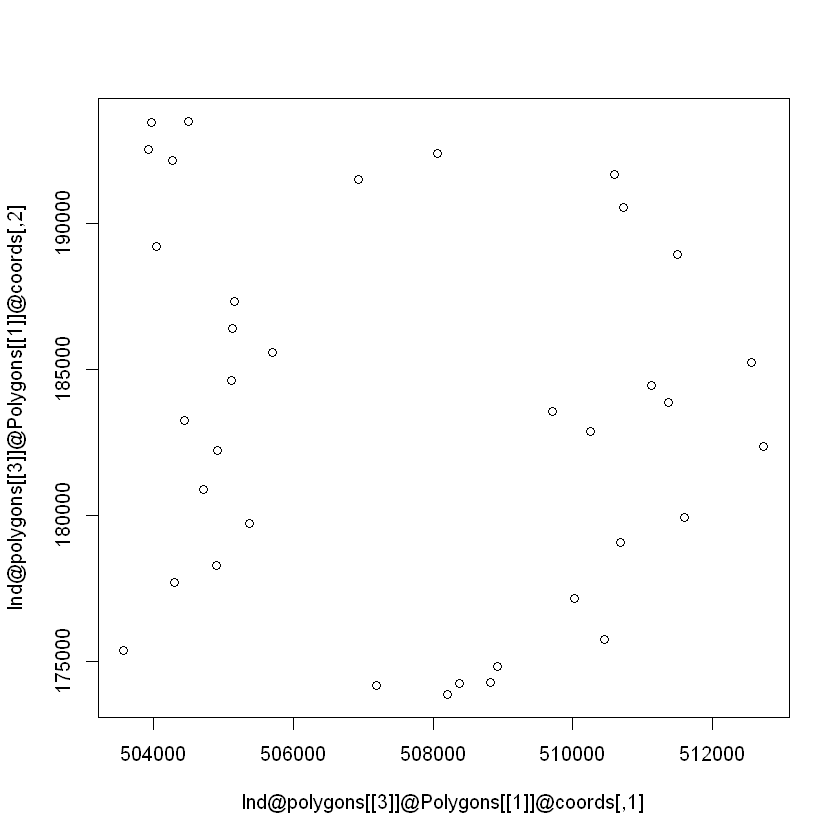

In [40]:
head(lnd@polygons[[3]]@Polygons[[1]]@coords, 3)
plot(lnd@polygons[[3]]@Polygons[[1]]@coords)


## Plot the geographical map using lnd spatial object

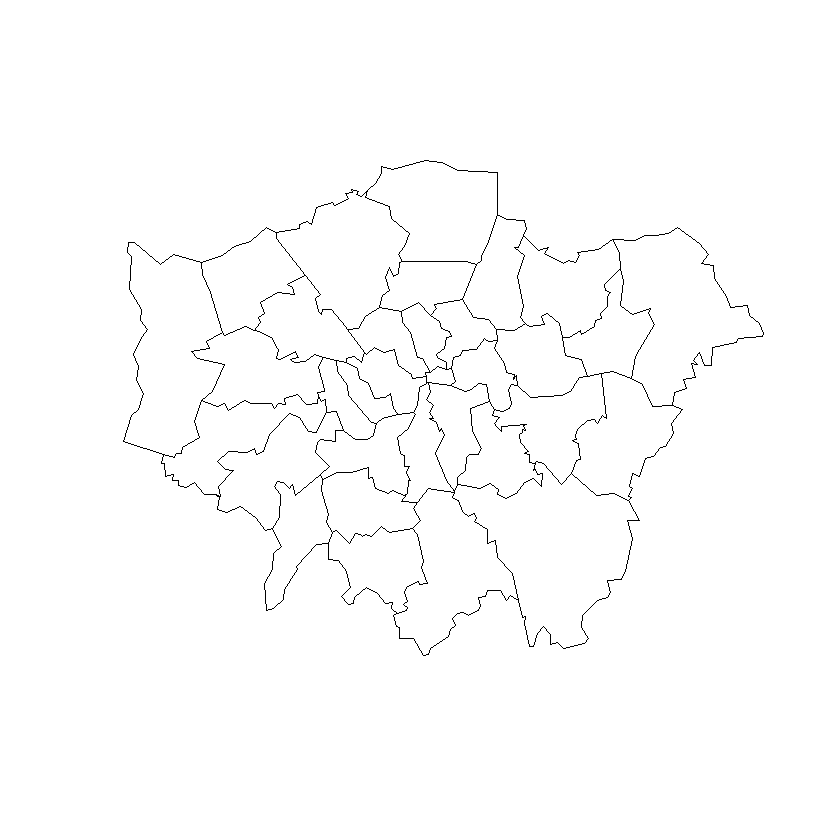

In [43]:
plot(lnd)

 ## Queries and Analysis based on the spatial data
 Select rows of lnd@data where sports participation is less than 15 

In [ ]:
lnd@data[lnd$Partic_Per < 15, ]

 Select zones where sports participation is between 10% and 20% and plot these zones in a map.

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE

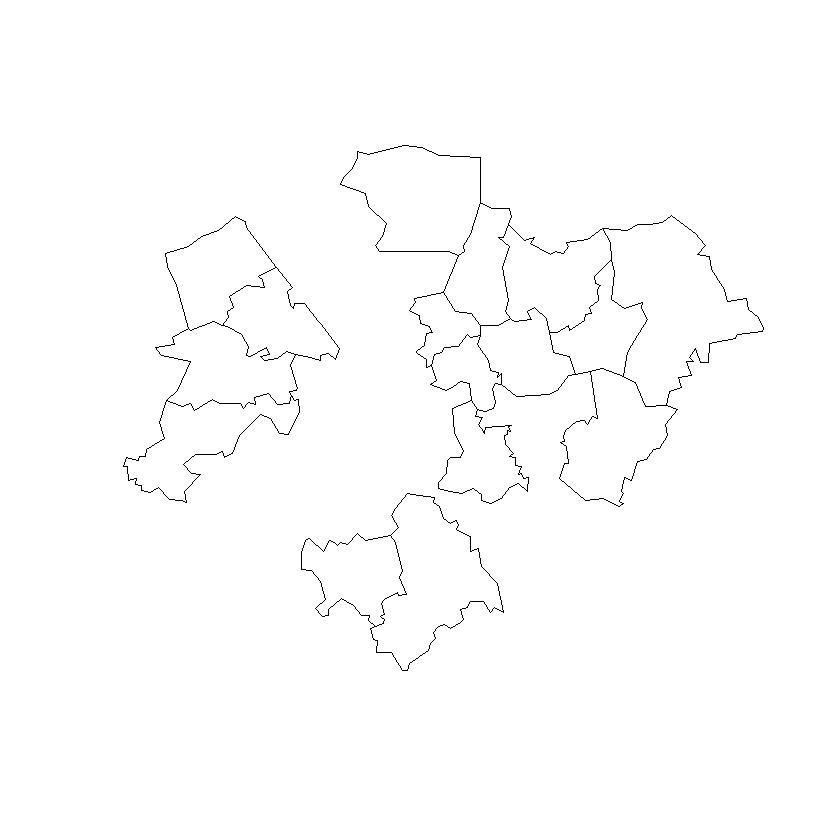

In [51]:
sel <- lnd$Partic_Per > 10 & lnd$Partic_Per < 20 
# head output of previous selection, a bunch of booleans
head(sel) 
# output plot shown below 
plot(lnd[sel, ]) 

Plotting the selected regions with the whole map

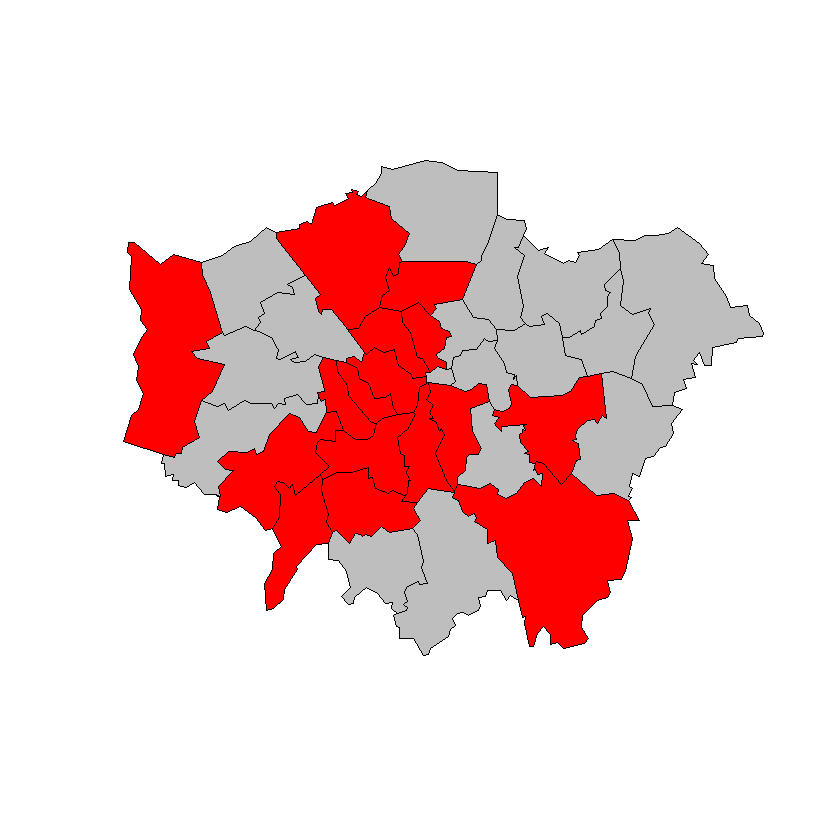

In [16]:
# plot the london_sport object, with color lightgrey
plot(lnd, col = "grey") 
# select zones where sports participation is greater than 25%.
sel <- lnd$Partic_Per > 20 
# add selected zones to map, with color red
plot(lnd[ sel, ], col = "red", add = TRUE) 

## More complex selection: the center of the map

1) Select the center of the city using rgeos library

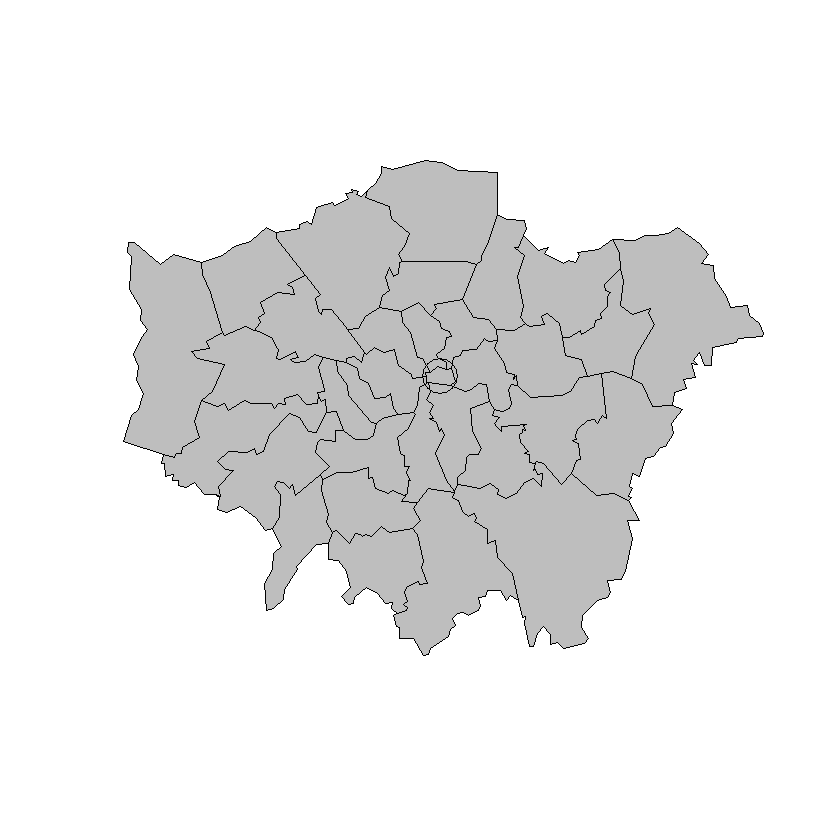

In [13]:
library(rgeos)
plot(lnd, col = "grey")
# find the geographic center of London 
cent_lnd <- gCentroid(lnd[lnd$name == "City of London",]) 
points(cent_lnd, cex = 4)

2) Select the regions that have some part within 10km from the center.

Creating a gBuffer of coordinates within 10km from the calculated center.

Selects the regions both in the buffer and in the whole map data set and plot.

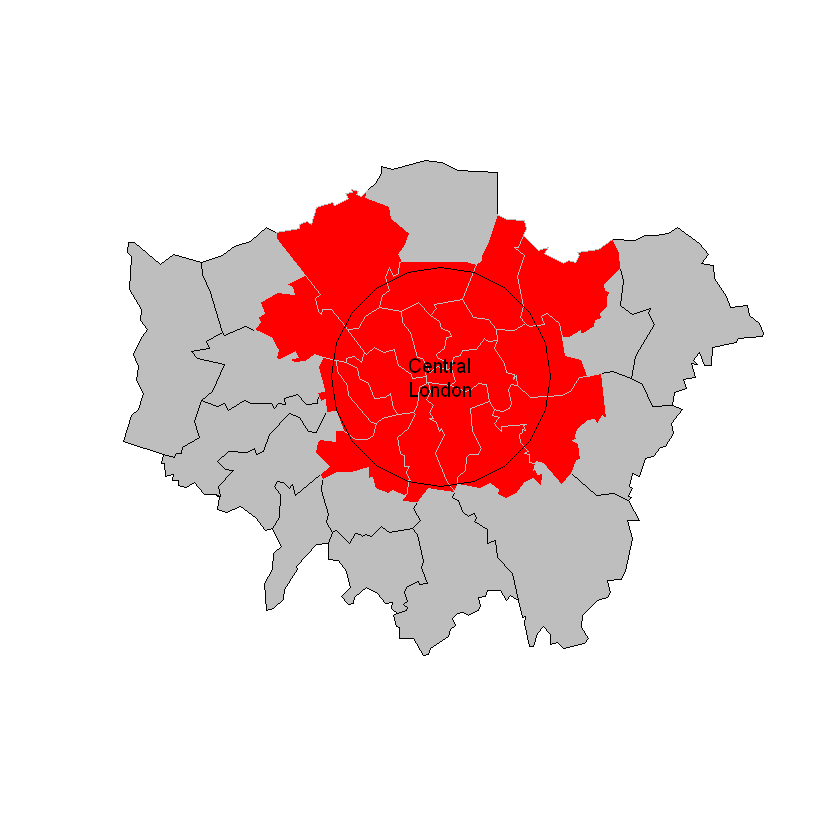

In [41]:
plot(lnd, col = "grey")
# set 10 km buffer
lnd_buffer <- gBuffer(spgeom = cent_lnd, width = 10000)
# select the indexes in both lnd_buffer and lnd
lnd_central <- lnd[lnd_buffer,]
#  plot the selected regions as red
plot(lnd_central, col = "red",border = "grey", add = T)
# plot the margin of the buffer, the circle that is 10km from the center
plot(lnd_buffer, add = T)
# add text labels to the plot
text(coordinates(cent_lnd), "Central\nLondon")

3) Another way of selection: select only the regions whose centers are within 10km

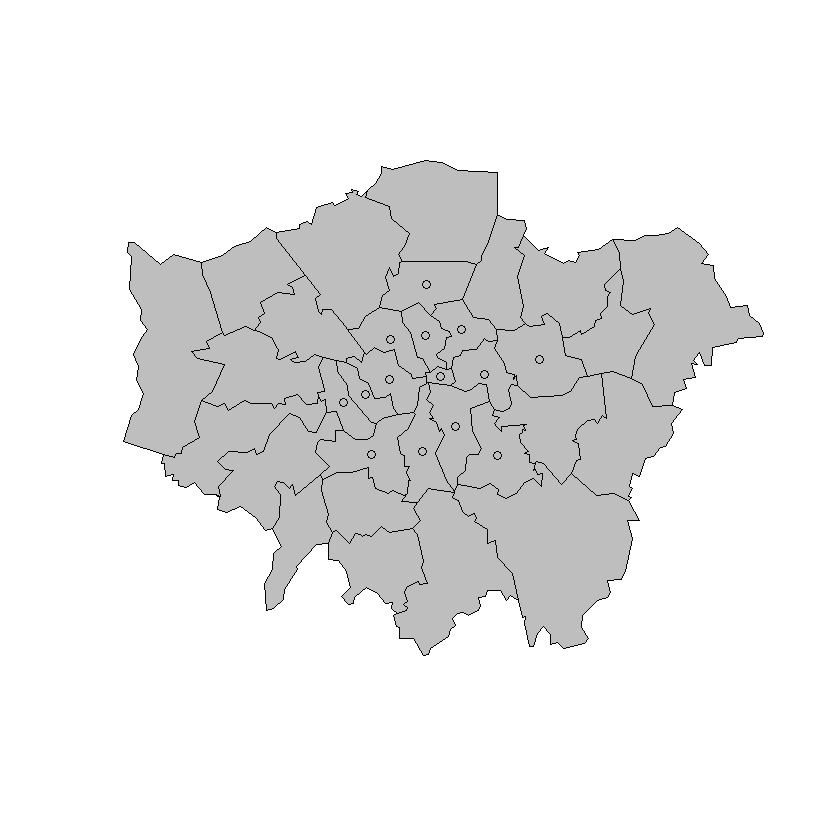

In [39]:
plot(lnd, col = "grey")
# selects only points within the buffer
# create spatialpoints (centers) of all the regions
lnd_cents <- SpatialPoints(coordinates(lnd),
  proj4string = CRS(proj4string(lnd))) 
# select the points inside the buffer (within 10km)
sel <- lnd_cents[lnd_buffer,] 
# show where the points are located
points(sel) 

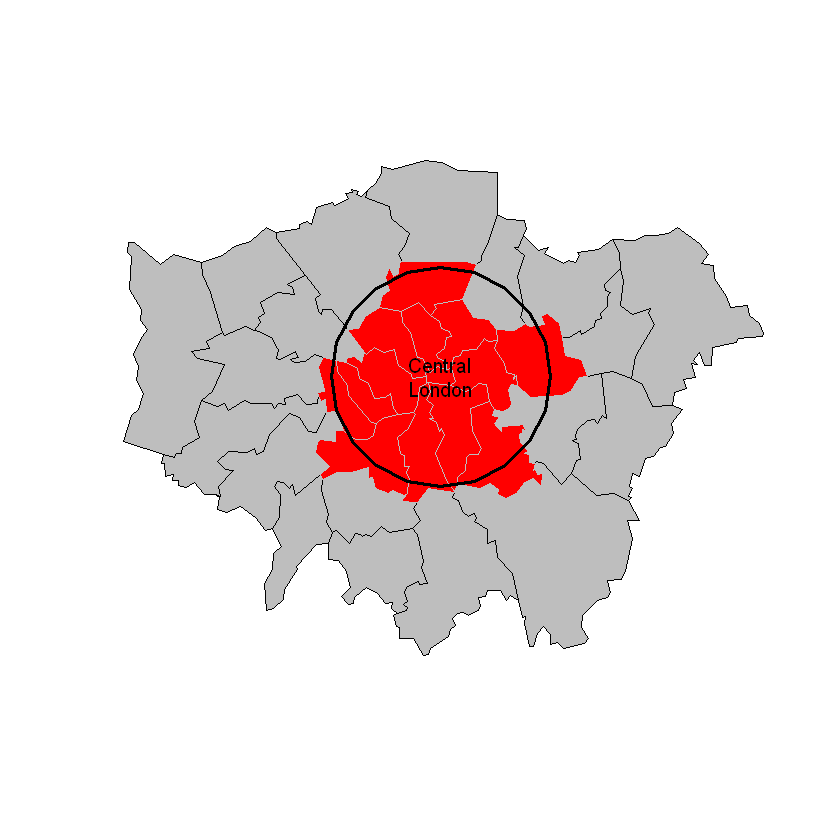

In [37]:
plot(lnd, col = "grey")
# select regions intersecting with sel from above
lnd_central <- lnd[sel,] 
plot(lnd_central, add = T, col = "red", 
  border = "grey")
plot(lnd_buffer, add = T, border = "black", lwd = 3)

# add text labels to the plot
text(coordinates(cent_lnd), "Central\nLondon")


## Adding attributes to tables and joining tables

The non-spatial data we are going to join to the lnd object contains records of crimes in London. This is stored in a comma separated values (.csv) ﬁle called “mps-recordedcrime-borough”.

In [116]:
library(rgdal) 
# Create new object called "lnd" from "london_sport" shapefile 
lnd <- readOGR(dsn = "dataSets", "london_sport") 
crime_data <- read.csv("dataSets/mps-recordedcrime-borough.csv", stringsAsFactors = FALSE)

OGR data source with driver: ESRI Shapefile 
Source: "dataSets", layer: "london_sport"
with 33 features
It has 4 fields


 We are going to use a function called aggregate to aggregate the crimes at the borough level, ready to join to our spatial lnd dataset. A new object called crime_data is created to store this data.


In [108]:
head(crime_data, 5) # display first 5 lines 
head(crime_data$CrimeType) # information about crime type

,X.1,X,Month,CrimeType,CrimeDetails,CrimeCount,Borough
1,1,1,201104,Violence Against The Person,Common Assault,81,Kensington and Chelsea
2,2,2,201104,Burglary,Burglary In A Dwelling,78,Kensington and Chelsea
3,3,3,201104,Other Notifiable Offences,Other Notifiable,12,Kensington and Chelsea
4,4,4,201104,Robbery,Personal Property,41,Kensington and Chelsea
5,5,5,201104,Theft & Handling,Handling Stolen Goods,3,Kensington and Chelsea


[1] "Violence Against The Person" "Burglary"                   
[3] "Other Notifiable Offences"   "Robbery"                    
[5] "Theft & Handling"            "Theft & Handling"

### Select the CrimeType "Theft & Handling"

In [109]:
# Filter out "Theft & Handling" crimes and save to crime_theft
crime_theft <- crime_data[crime_data$CrimeType == "Theft & Handling", ] 
head(crime_theft, 5) # take a look at the result (replace 2 with 10 to see more rows)

,X.1,X,Month,CrimeType,CrimeDetails,CrimeCount,Borough
5,5,5,201104,Theft & Handling,Handling Stolen Goods,3,Kensington and Chelsea
6,6,6,201104,Theft & Handling,Theft/Taking Of Pedal Cycle,59,Kensington and Chelsea
13,13,13,201104,Theft & Handling,Motor Vehicle Interference & Tampering,5,Kensington and Chelsea
15,15,15,201104,Theft & Handling,Theft From Motor Vehicle,132,Kensington and Chelsea
21,21,21,201104,Theft & Handling,Theft Person,76,Kensington and Chelsea


### Calculate CrimeCount of each region

In [118]:
# Calculate the sum of the crime count for each district, save result
crime_ag <- aggregate(CrimeCount ~ Borough, FUN = sum, data = crime_theft) 
# Show the first two rows of the aggregated crime data 
head(crime_ag, 5)

,Borough,CrimeCount
1,Barking and Dagenham,12222
2,Barnet,19821
3,Bexley,8155
4,Brent,16823
5,Bromley,15172


### Join the attribute CrimeCount to the lnd table

In [119]:
# dataset to add the attribute CrimeCount to
head(lnd$name) 
# the attribute to join 
head(crime_ag$Borough) 
crime_ag <- rename(crime_ag, name = Borough) # rename the 'Borough' heading to 'name' # 
head(left_join(lnd@data, crime_ag,by = "name"))
lnd@data <- left_join(lnd@data, crime_ag)


[1] Bromley              Richmond upon Thames Hillingdon          
[4] Havering             Kingston upon Thames Sutton              
33 Levels: Barking and Dagenham Barnet Bexley Brent Bromley ... Westminster

[1] "Barking and Dagenham" "Barnet"               "Bexley"              
[4] "Brent"                "Bromley"              "Camden"

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining character vector and factor, coercing into character vector"

,ons_label,name,Partic_Per,Pop_2001,CrimeCount
1,00AF,Bromley,21.7,295535,15172
2,00BD,Richmond upon Thames,26.6,172330,9715
3,00AS,Hillingdon,21.5,243006,15302
4,00AR,Havering,17.9,224262,12611
5,00AX,Kingston upon Thames,24.4,147271,9023
6,00BF,Sutton,19.3,179767,8810


Joining, by = "name"
Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining character vector and factor, coercing into character vector"

### Plot different levels of CrimeCount with different shades of Color

[1]  TRUE FALSE  TRUE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE

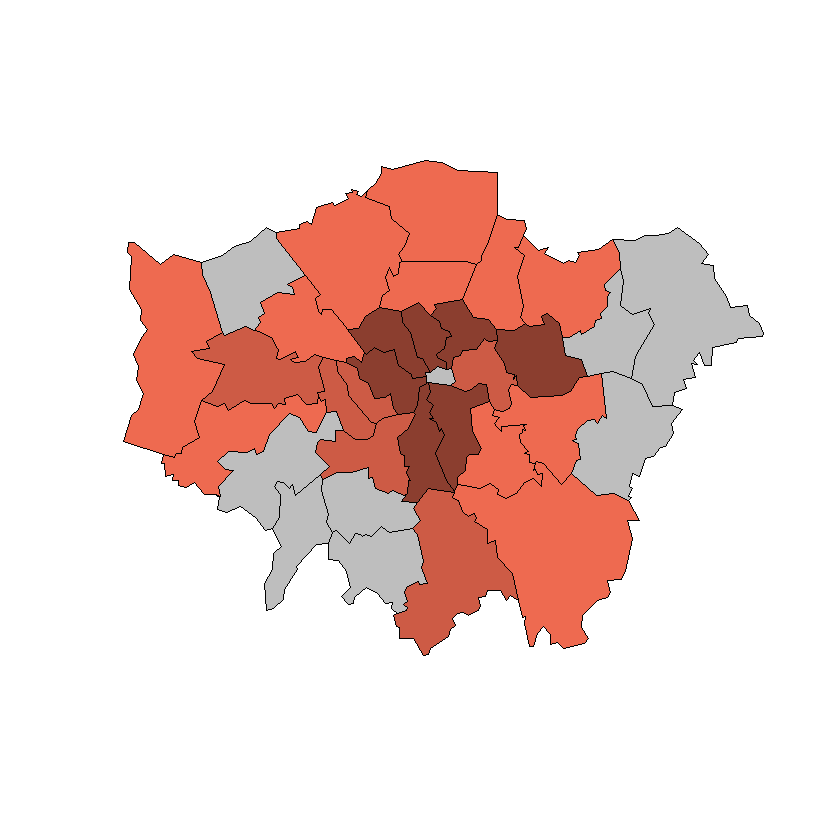

In [120]:

plot(lnd, col = "grey") 
# select zones where sports participation is greater than 25%.
sel <- lnd$CrimeCount > 15000 
head(na.omit(sel))
# add selected zones to map, with color red
plot(lnd[ na.omit(sel), ], col = "coral2", add = TRUE) 
sel <- lnd$CrimeCount > 20000 
head(na.omit(sel))
# add selected zones to map, with color red
plot(lnd[ na.omit(sel), ], col = "coral3", add = TRUE) 
sel <- lnd$CrimeCount > 25000 
head(na.omit(sel))
# add selected zones to map, with color red
plot(lnd[ na.omit(sel), ], col = "coral4", add = TRUE) 

## Summary and references

This tutorial highlighted just a few elements of what is possible with data analysis and visualization based on R and its libraries. An example of geospatial data in R is shown.  Much more detail about the libraries and questions on R, ggplot2 and other R libraries is general are available from the following links.

1. R and ggplot2: http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html
2. Introduction to visualising spatial data in R: https://cran.r-project.org/doc/contrib/intro-spatial-rl.pdf
